In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
mktg_df = pd.read_csv("/content/Marketing_data.csv")

In [ ]:
mktg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
mktg_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
mktg_df[mktg_df["CASH_ADVANCE"] == mktg_df["CASH_ADVANCE"].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


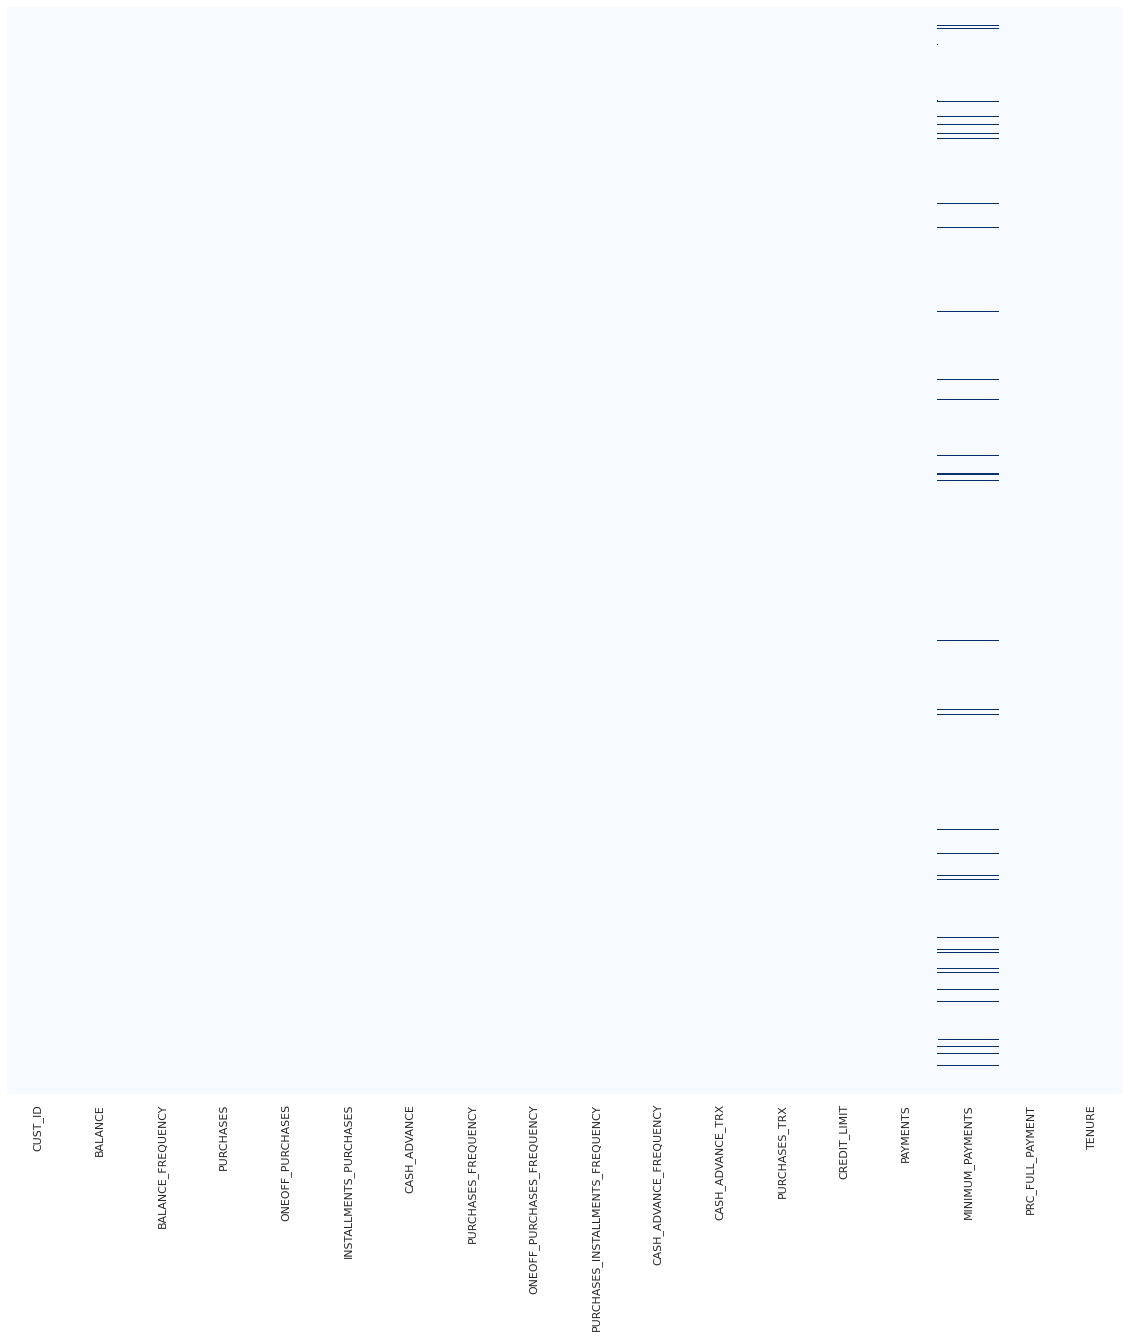

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(mktg_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [ ]:
mktg_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
mktg_df.loc[(mktg_df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = mktg_df["MINIMUM_PAYMENTS"].mean()

In [ ]:
mktg_df.loc[(mktg_df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = mktg_df["CREDIT_LIMIT"].mean()

In [ ]:
mktg_df.duplicated().sum()

0

In [ ]:
mktg_df.drop(["CUST_ID"], axis=1, inplace=True)

In [ ]:
mktg_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

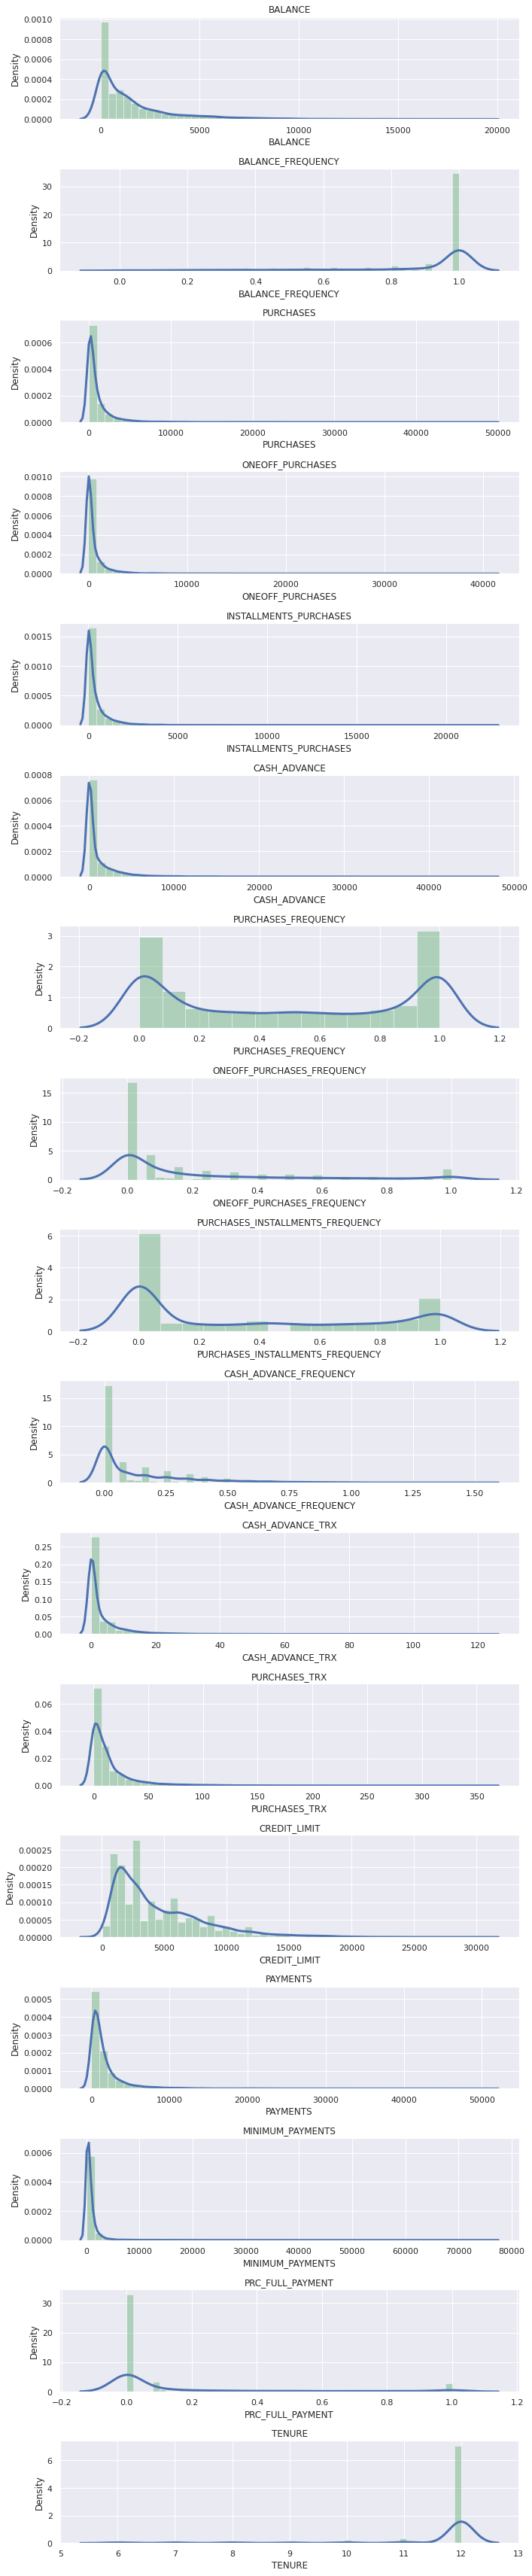

In [ ]:
plt.figure(figsize=[10, 50])

for i in range(len(mktg_df.columns)):
  plt.subplot(18, 1, i + 1)
  plt.title(mktg_df.columns[i])
  sns.distplot(mktg_df[mktg_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})

plt.tight_layout()
plt.show()

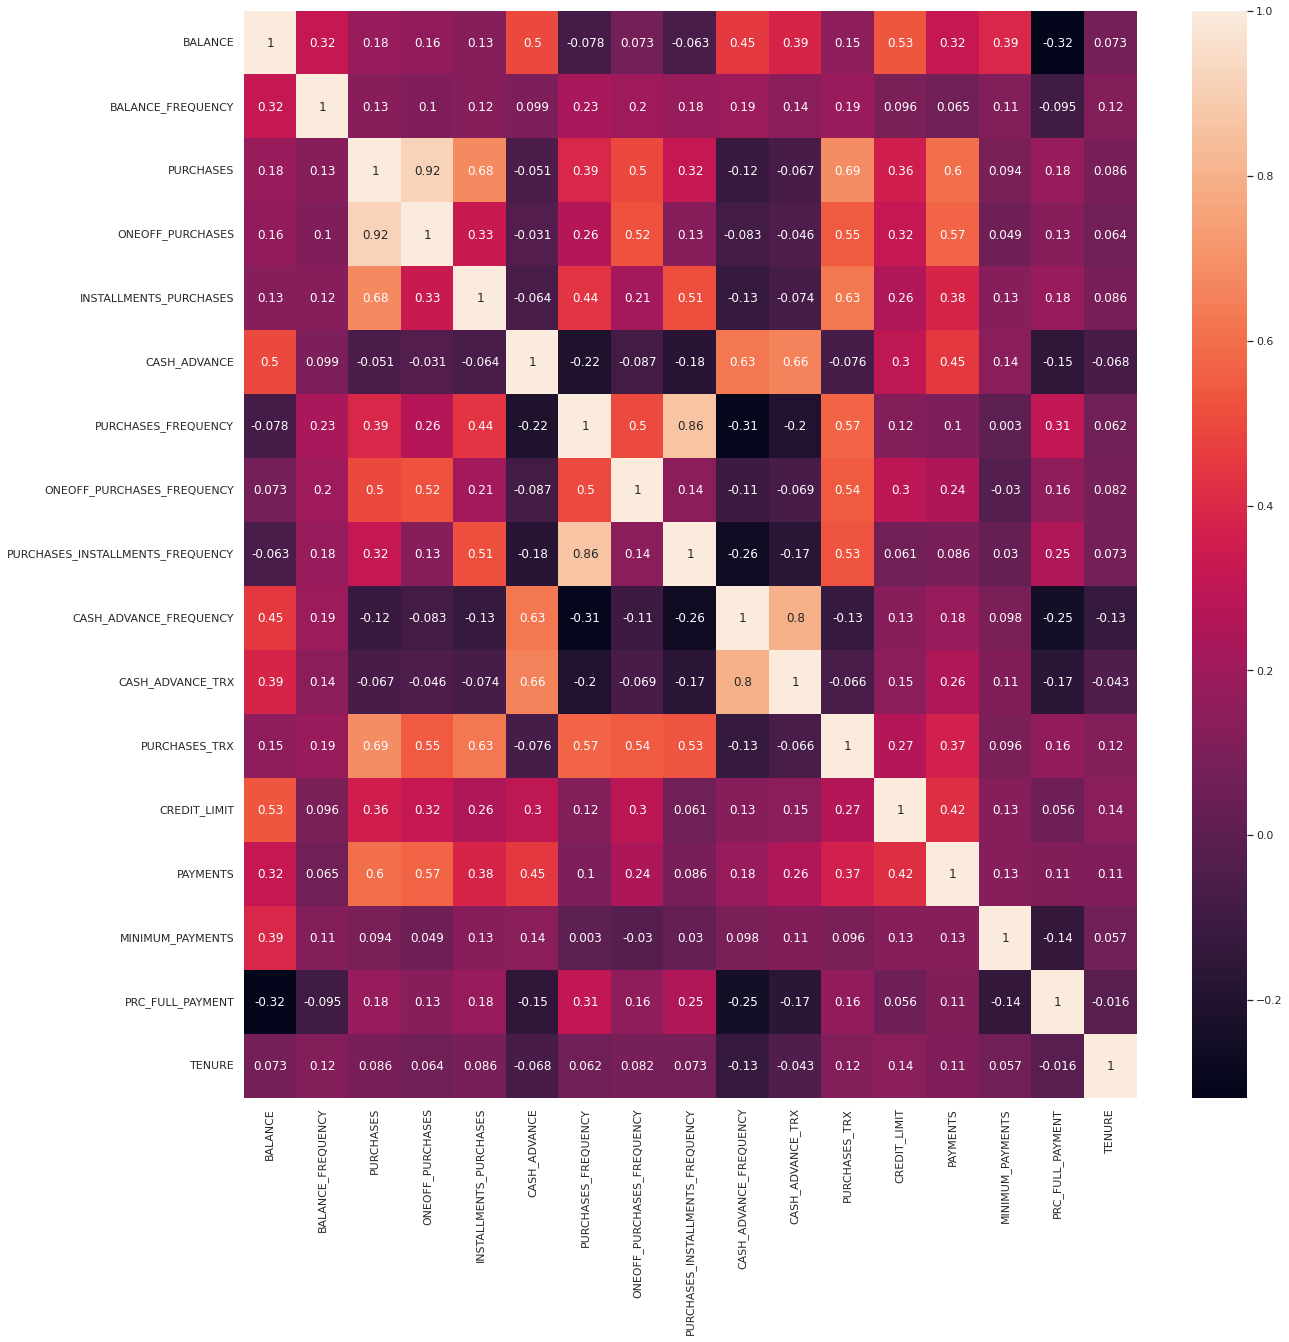

In [ ]:
correlations = mktg_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

In [ ]:
scaler = StandardScaler()
mktg_df_scaled = scaler.fit_transform(mktg_df)

In [ ]:
mktg_df.shape

(8950, 17)

In [ ]:
mktg_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
scores = []

for i in range(1, 21):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(mktg_df_scaled)
  scores.append(kmeans.inertia_)

scores

[152149.99999999983,
 127785.06996309517,
 111986.89546457017,
 99073.93826774803,
 91502.21594607373,
 84852.59400226288,
 79528.28683572335,
 74491.27935775876,
 69832.07707067032,
 66963.1530990584,
 63633.330982125,
 61374.35867266828,
 59177.441779673696,
 57506.655719624665,
 55930.44976153982,
 54288.63963259404,
 53179.75202117783,
 51879.3619884067,
 50968.68096498018,
 49572.94304113592]

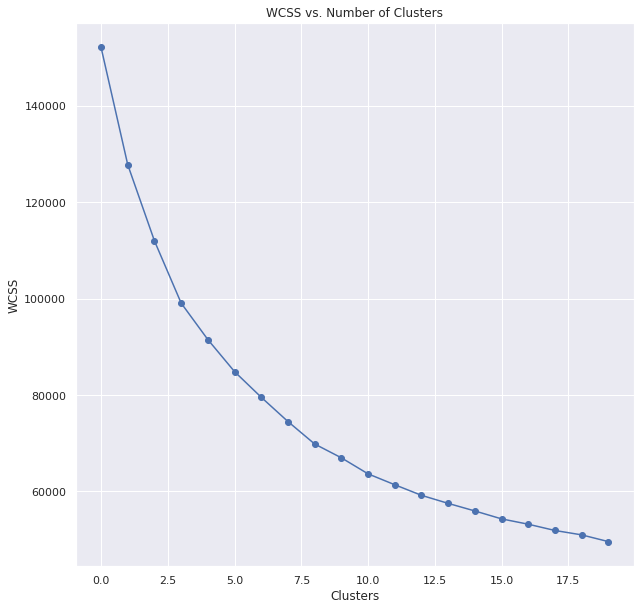

In [ ]:
plt.figure(figsize=[10, 10])
plt.plot(scores, "bo-")
plt.title("WCSS vs. Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(8)
kmeans.fit(mktg_df_scaled)
labels = kmeans.labels_
labels

array([4, 2, 7, ..., 0, 4, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [mktg_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.396746,0.307922,-0.062131,-0.255737,0.322878,-0.359517,0.977188,-0.409216,1.170097,-0.460091,-0.356660,0.135509,-0.322256,-0.241998,-0.107820,0.355697,-0.025126
1,1.036750,0.464401,2.514202,1.825444,2.591186,-0.155994,1.164784,1.580549,1.270756,-0.279211,-0.146260,3.130116,1.310212,1.454854,0.385331,0.260577,0.337262
2,1.582500,0.374102,-0.224487,-0.156292,-0.243724,1.970249,-0.476792,-0.202636,-0.428806,1.932767,1.877624,-0.275989,0.966155,0.759823,0.358318,-0.390251,-0.097126
3,-0.698229,-2.132395,-0.318238,-0.236661,-0.317581,-0.306524,-0.567315,-0.433735,-0.462734,-0.483149,-0.358074,-0.428114,-0.215265,-0.223704,-0.255581,0.250288,-0.163367
4,-0.007032,0.371658,-0.362229,-0.245203,-0.405919,-0.071747,-0.871112,-0.399340,-0.771726,0.149728,-0.017336,-0.489612,-0.337548,-0.264930,-0.054063,-0.454579,-0.010509
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409
7,-0.114099,0.394865,0.527254,0.649138,0.053955,-0.328180,0.958799,1.832989,0.189033,-0.406716,-0.331347,0.603625,0.437192,0.131576,-0.155543,0.403693,0.207779


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
mktg_cluster_df = pd.concat([mktg_df, pd.DataFrame({"cluster": labels})], axis=1)
mktg_cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


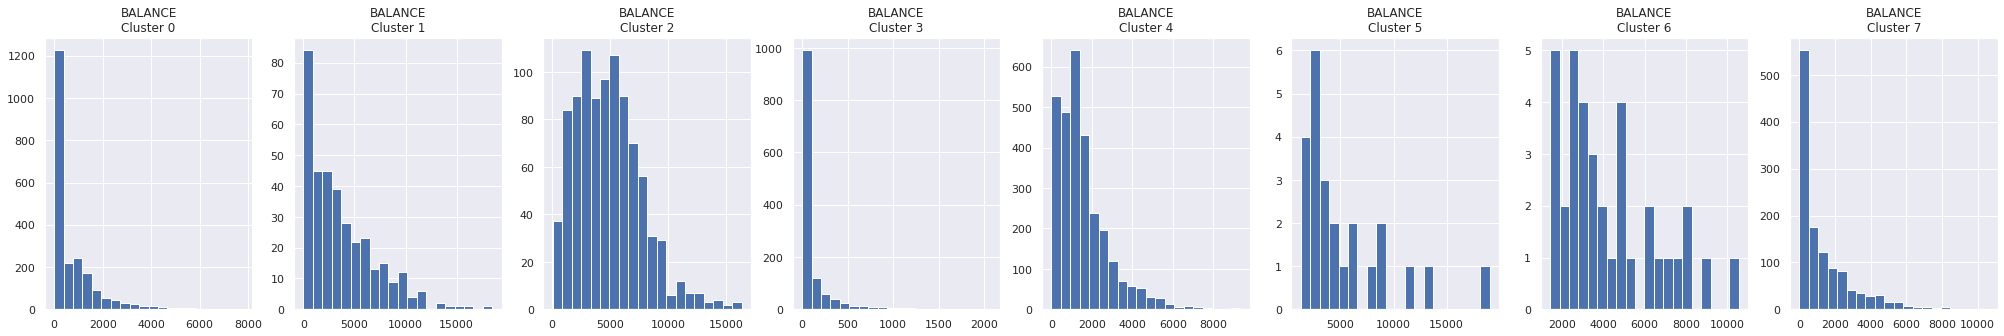

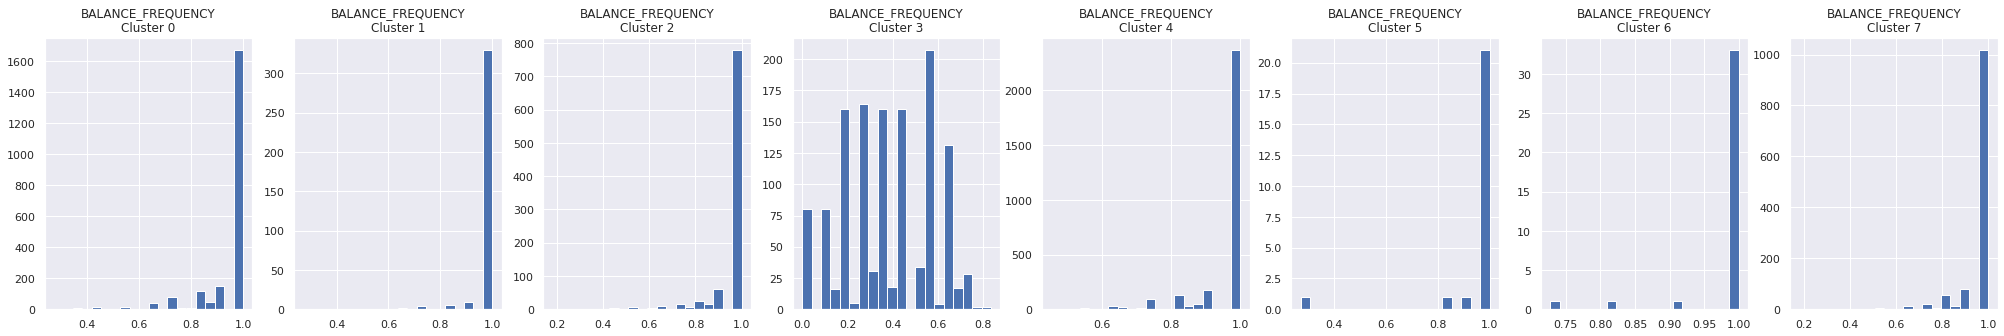

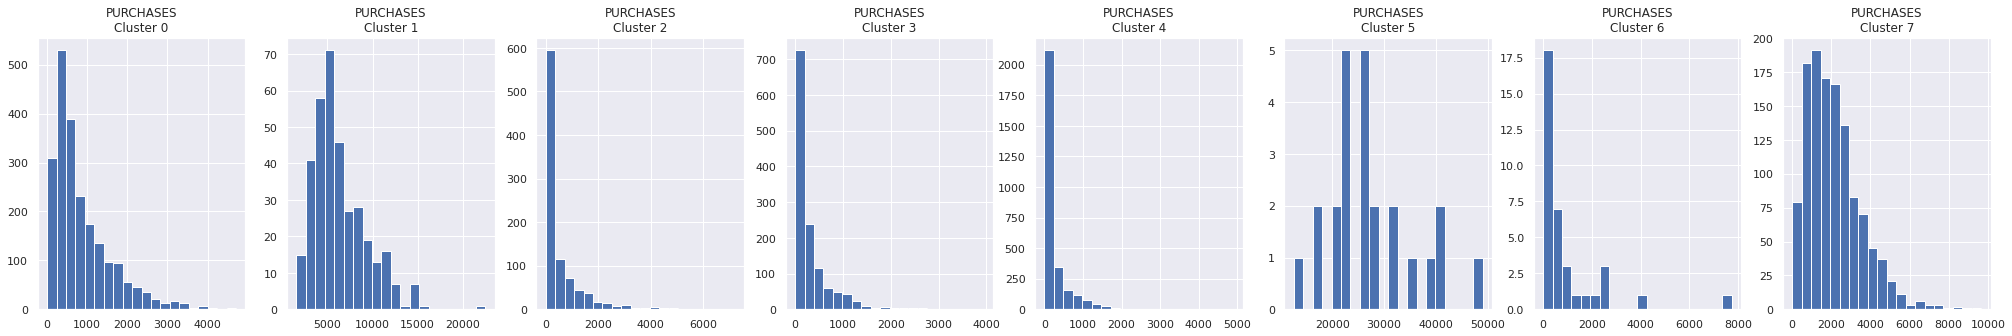

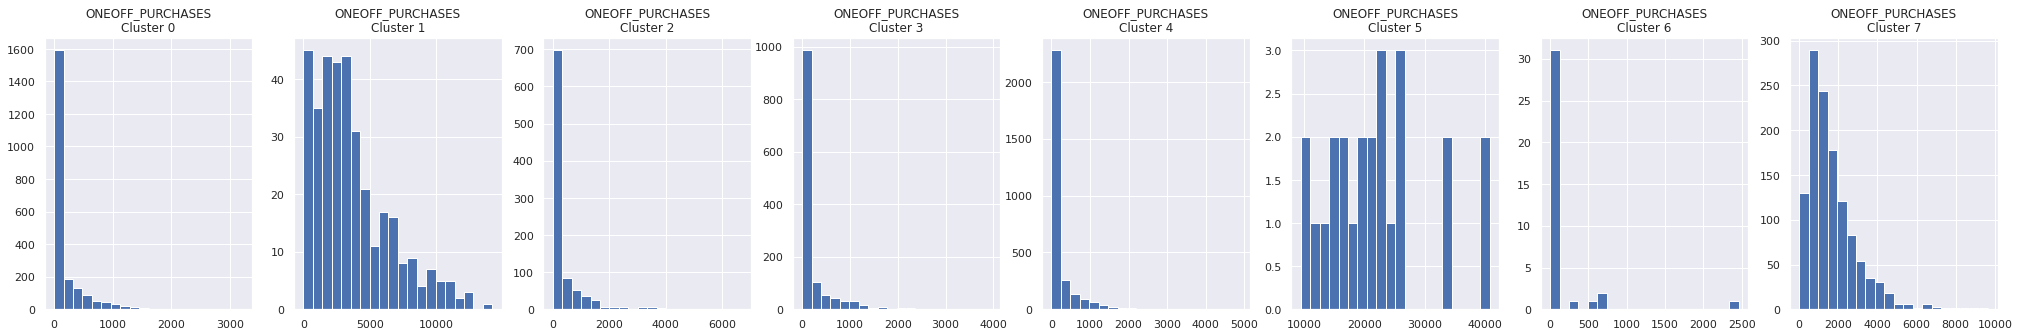

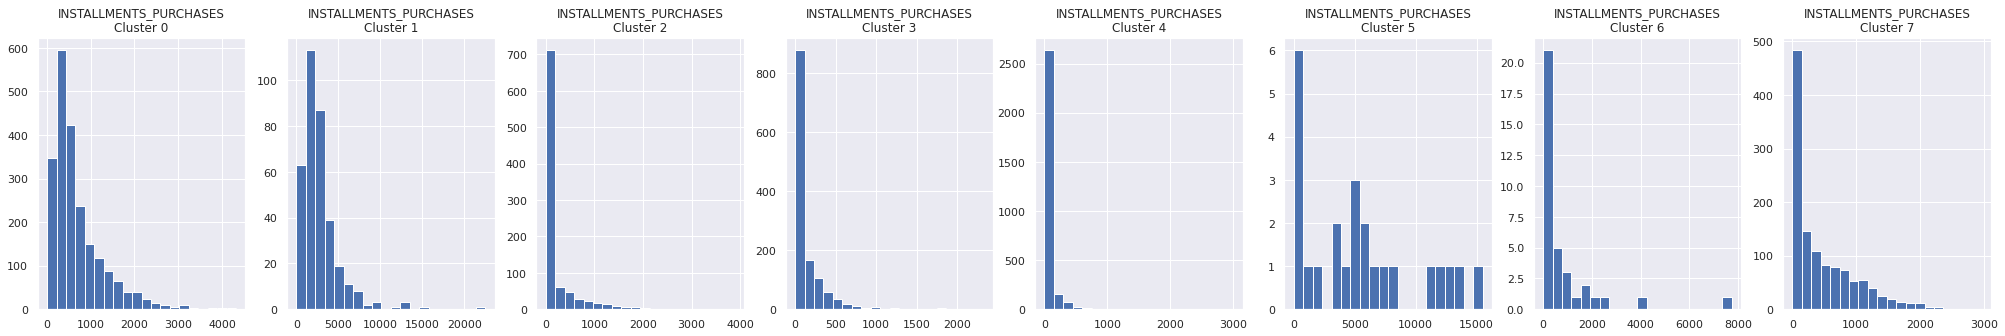

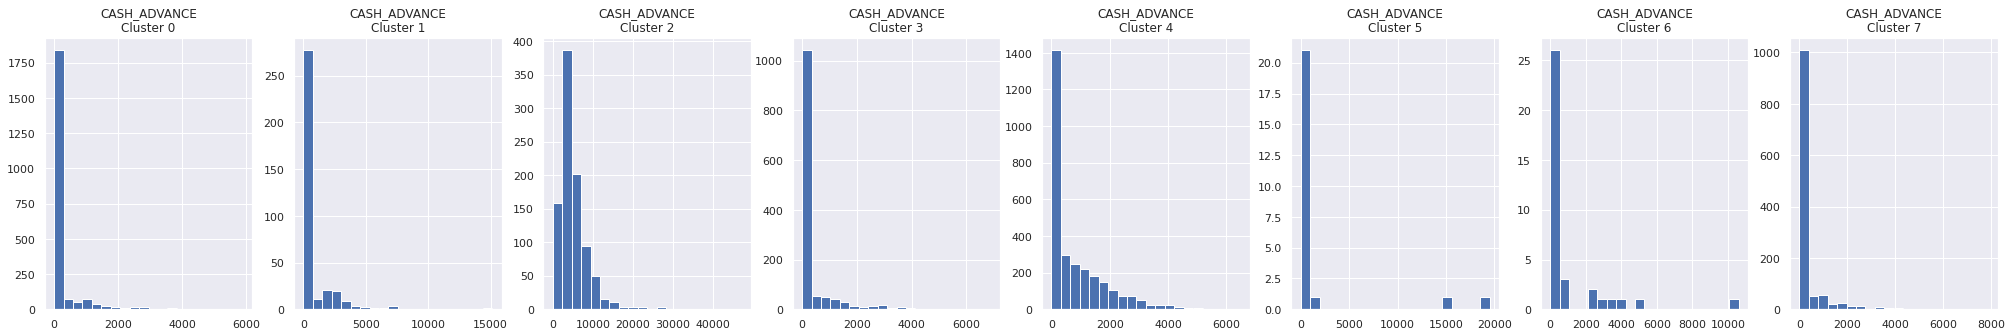

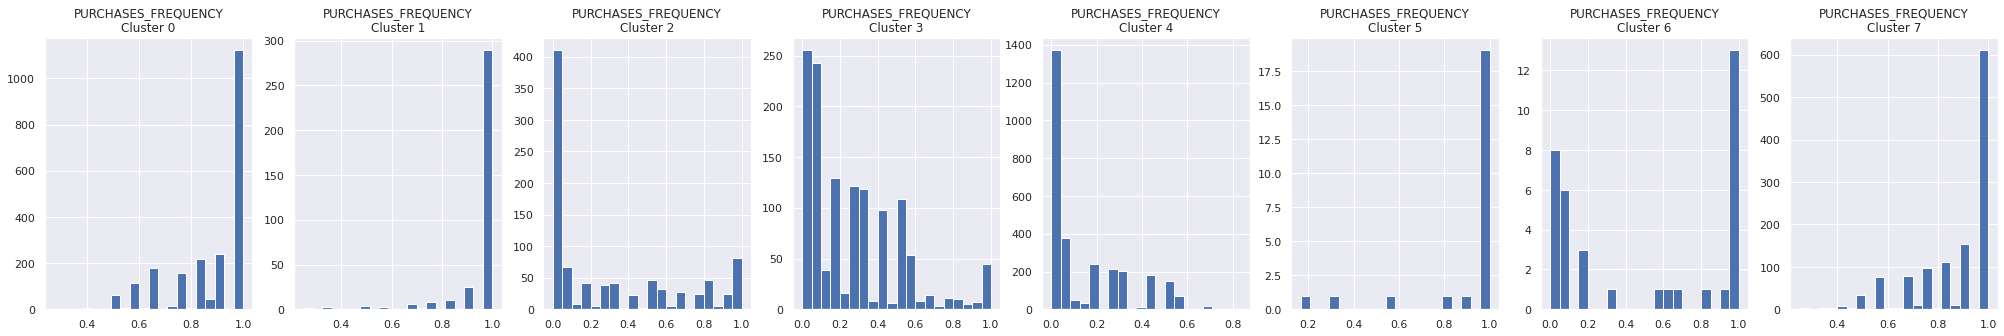

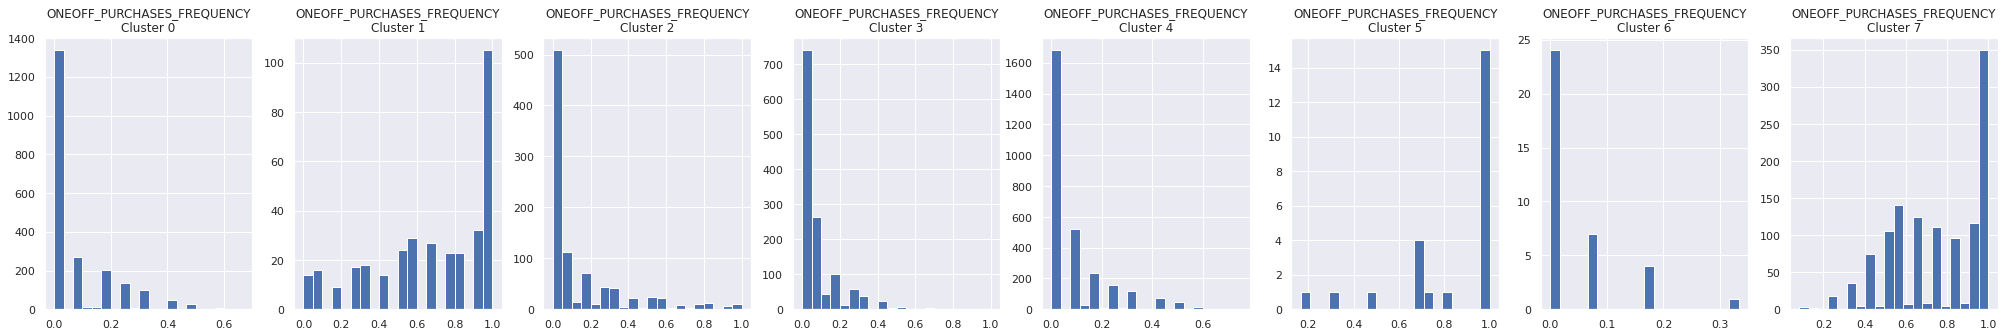

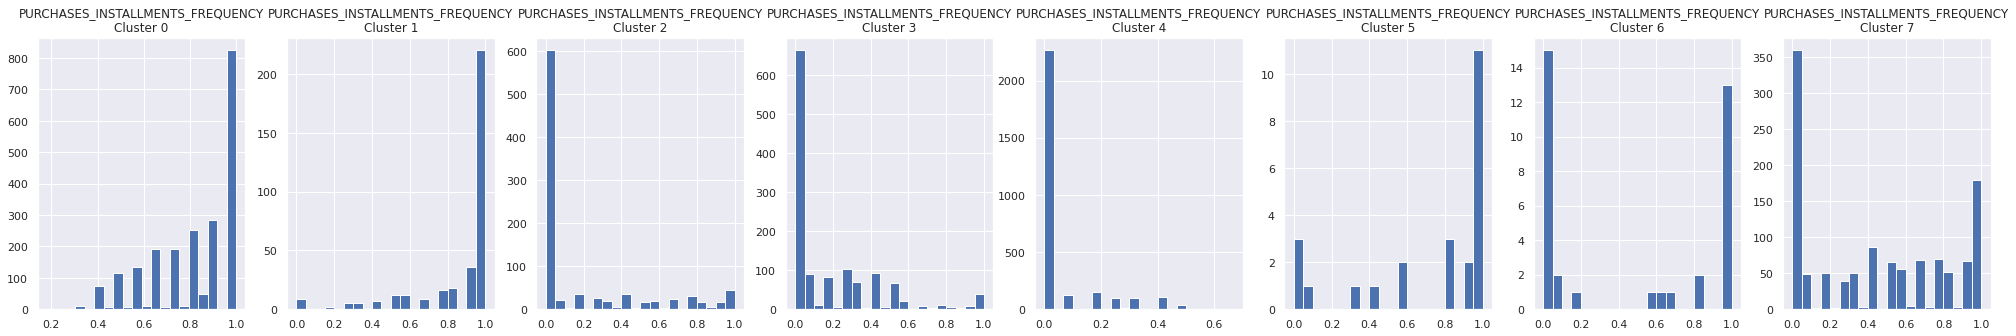

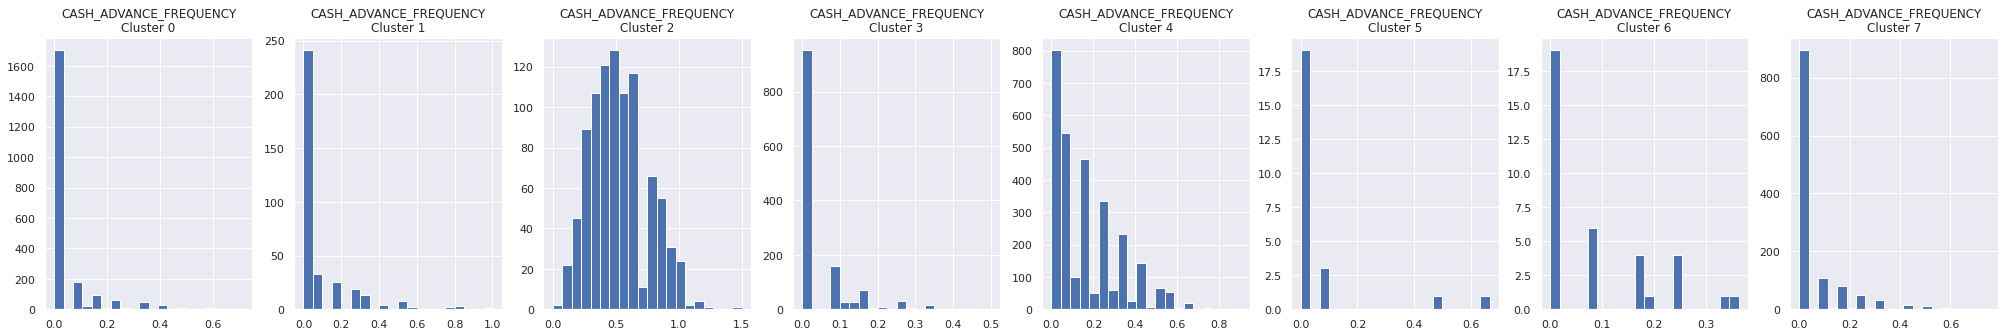

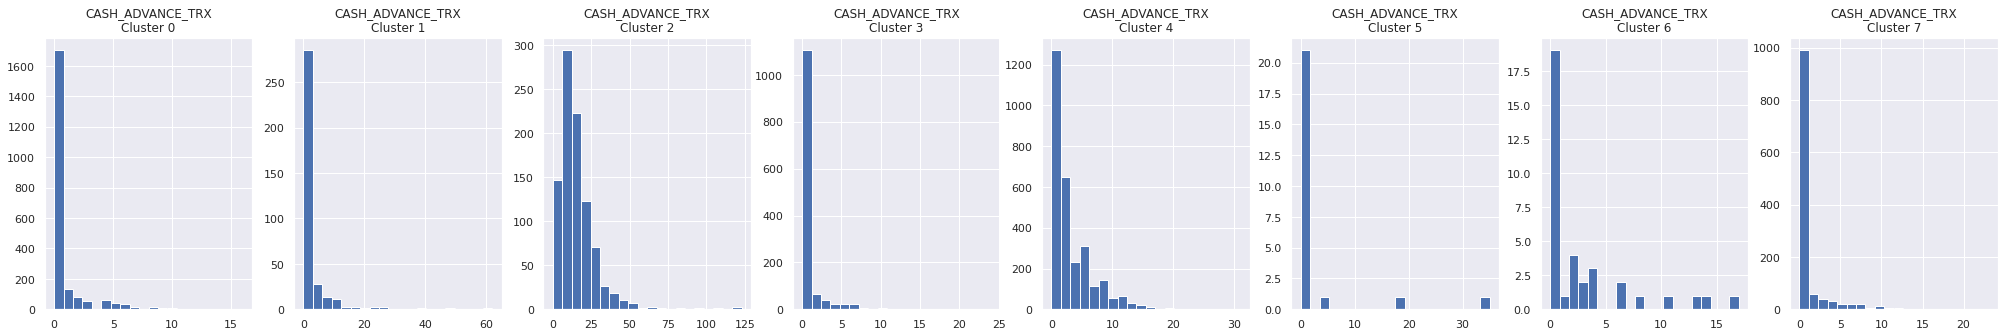

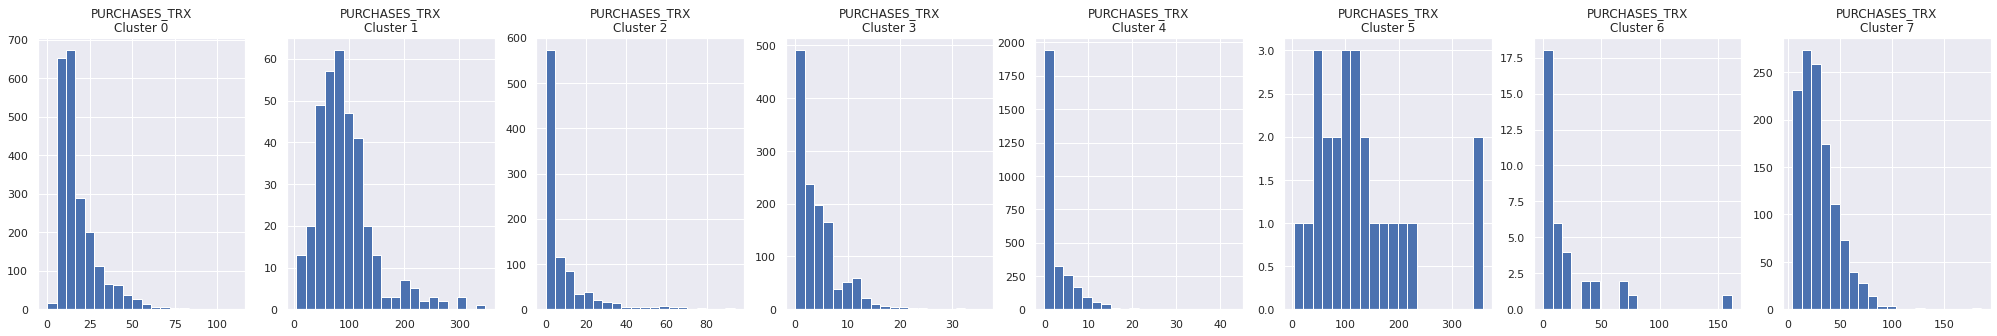

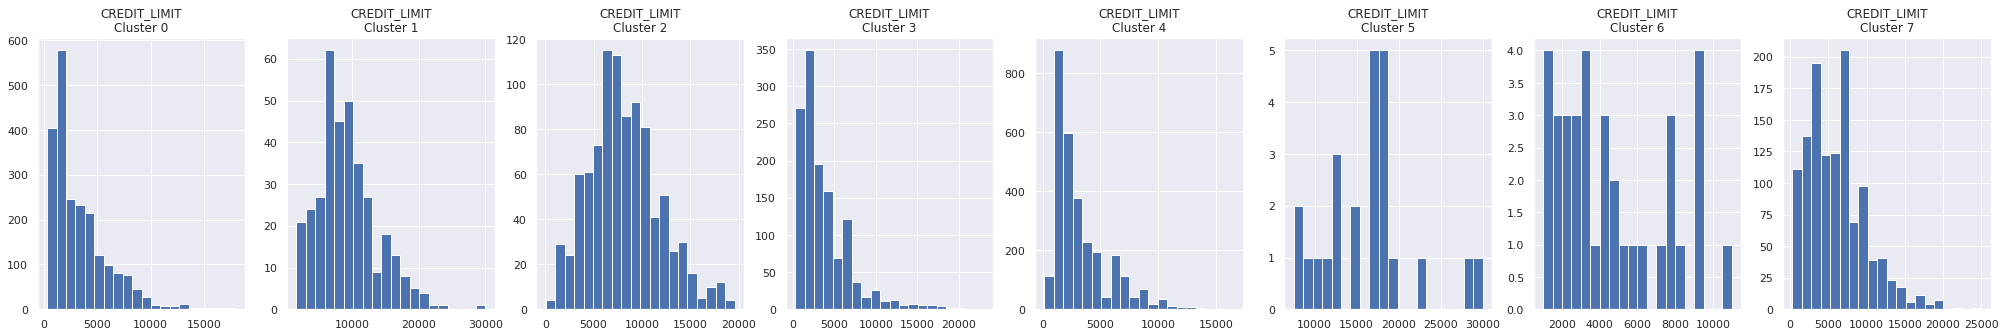

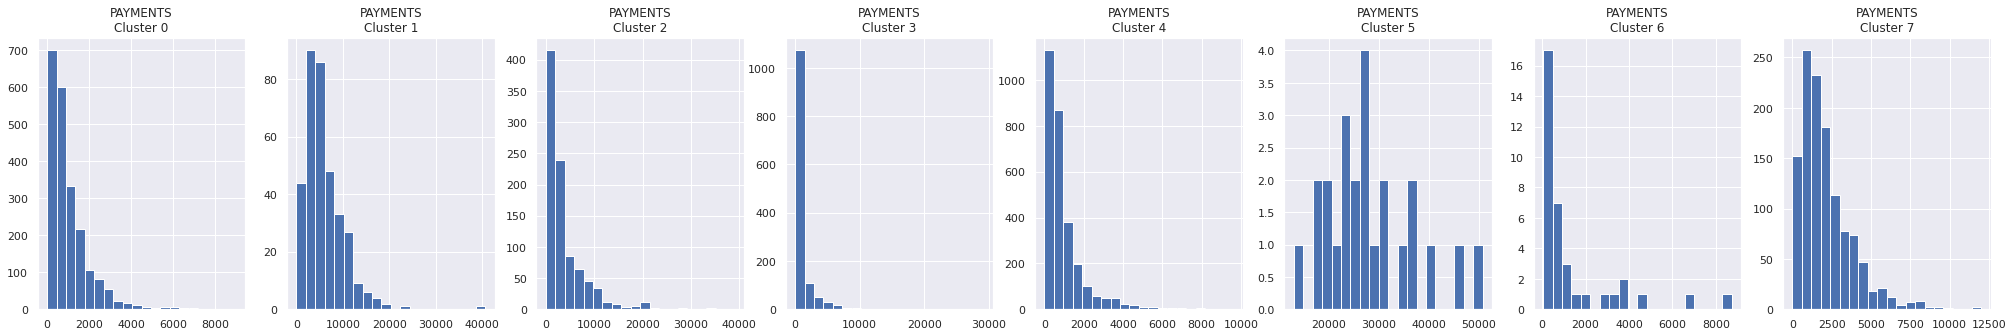

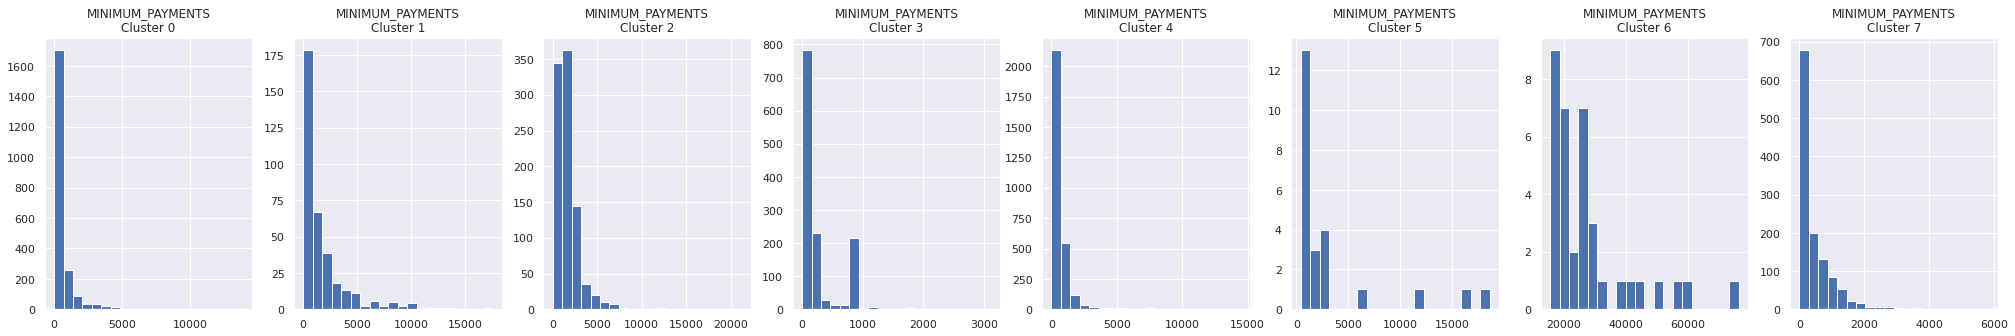

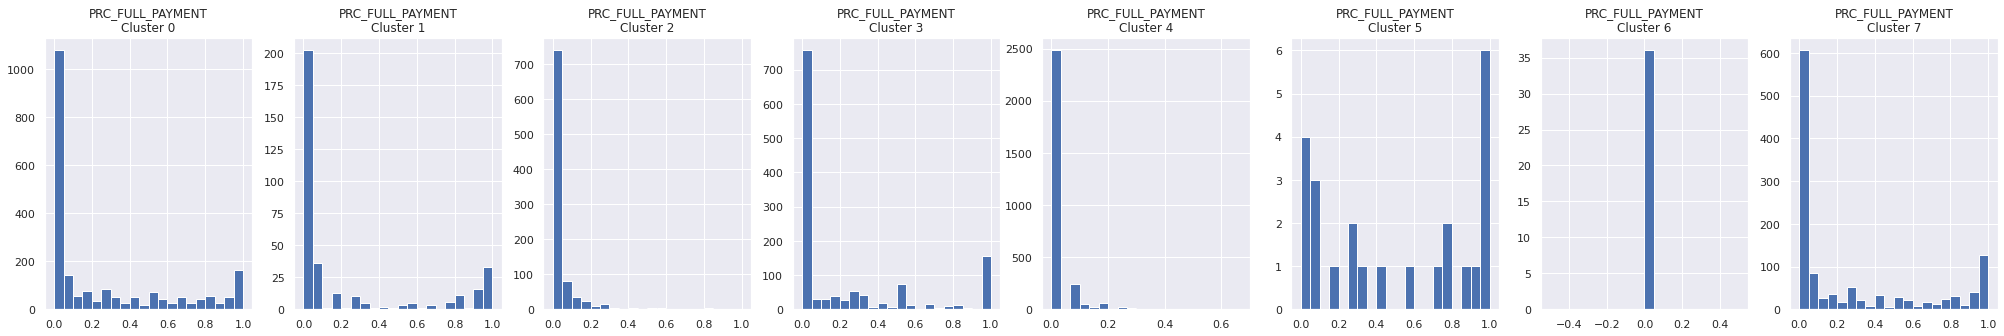

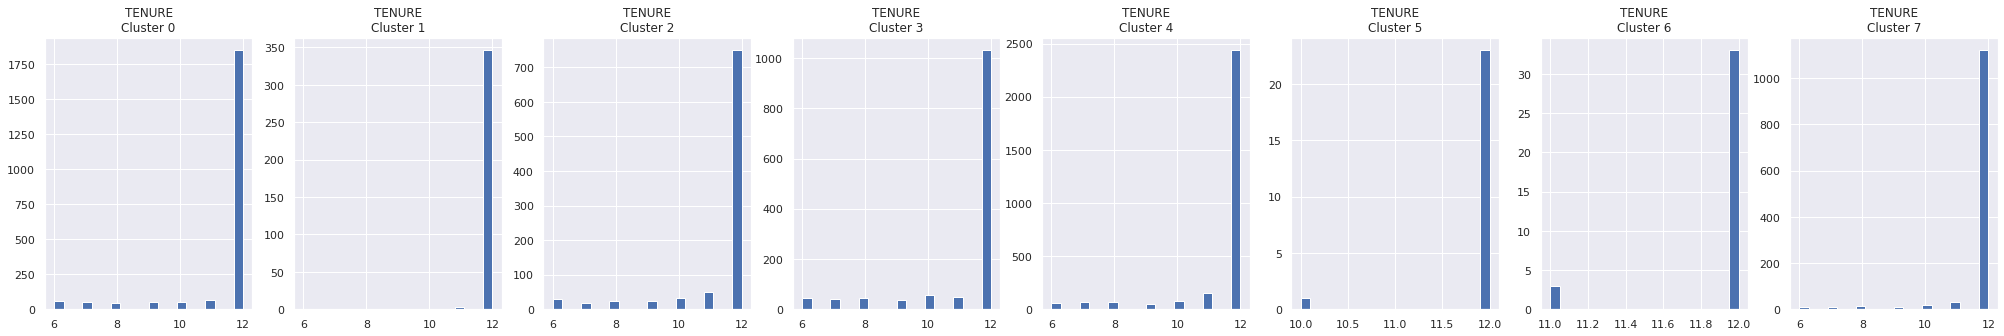

In [ ]:
for i in mktg_df.columns:
  plt.figure(figsize=[35,5])

  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = mktg_cluster_df[mktg_cluster_df["cluster"] == j]
    cluster[i].hist(bins=20)
    plt.title(f"{i}\nCluster {j}")
  
plt.show()

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(mktg_df_scaled)
principal_components

array([[-1.68221933, -1.07644856],
       [-1.1382908 ,  2.5065192 ],
       [ 0.96968153, -0.38357049],
       ...,
       [-0.92620428, -1.81079271],
       [-2.33655205, -0.65796509],
       [-0.55642431, -0.40047722]])

In [ ]:
pca_df = pd.DataFrame(data = principal_components, columns = ["pca1", "pca2"])
pca_df

,pca1,pca2
0,-1.682219,-1.076449
1,-1.138291,2.506519
2,0.969682,-0.383570
3,-0.873625,0.043163
4,-1.599434,-0.688578
...,...,...
8945,-0.359630,-2.016149
8946,-0.564369,-1.639159
8947,-0.926204,-1.810793
8948,-2.336552,-0.657965


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-1.682219,-1.076449,4
1,-1.138291,2.506519,2
2,0.969682,-0.383570,7
3,-0.873625,0.043163,4
4,-1.599434,-0.688578,4
...,...,...,...
8945,-0.359630,-2.016149,0
8946,-0.564369,-1.639159,0
8947,-0.926204,-1.810793,0
8948,-2.336552,-0.657965,4


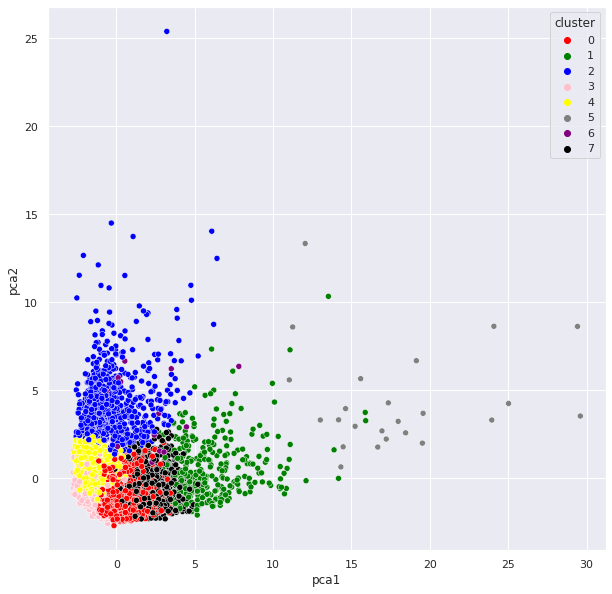

In [ ]:
plt.figure(figsize=[10,10])
ax = sns.scatterplot(x = "pca1", y="pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])